In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import imgtools

In [113]:
rawimg = imgtools.load_tif_stack(r'T:\axonal_imaging_LP\250426_DMM_DMM046_LPaxons\fm4\file_00004.tif')

In [114]:
max_proj = np.max(rawimg,0)

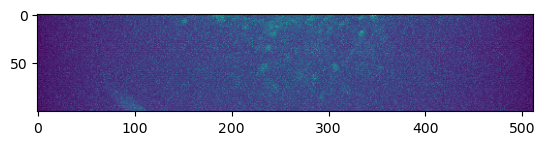

In [116]:
plt.imshow(np.max(rawimg[:,412:,:],0))

In [117]:
mean_of_banded_block = np.mean(rawimg[:,412:,:],1)

Text(0, 0.5, 'time (frames)')

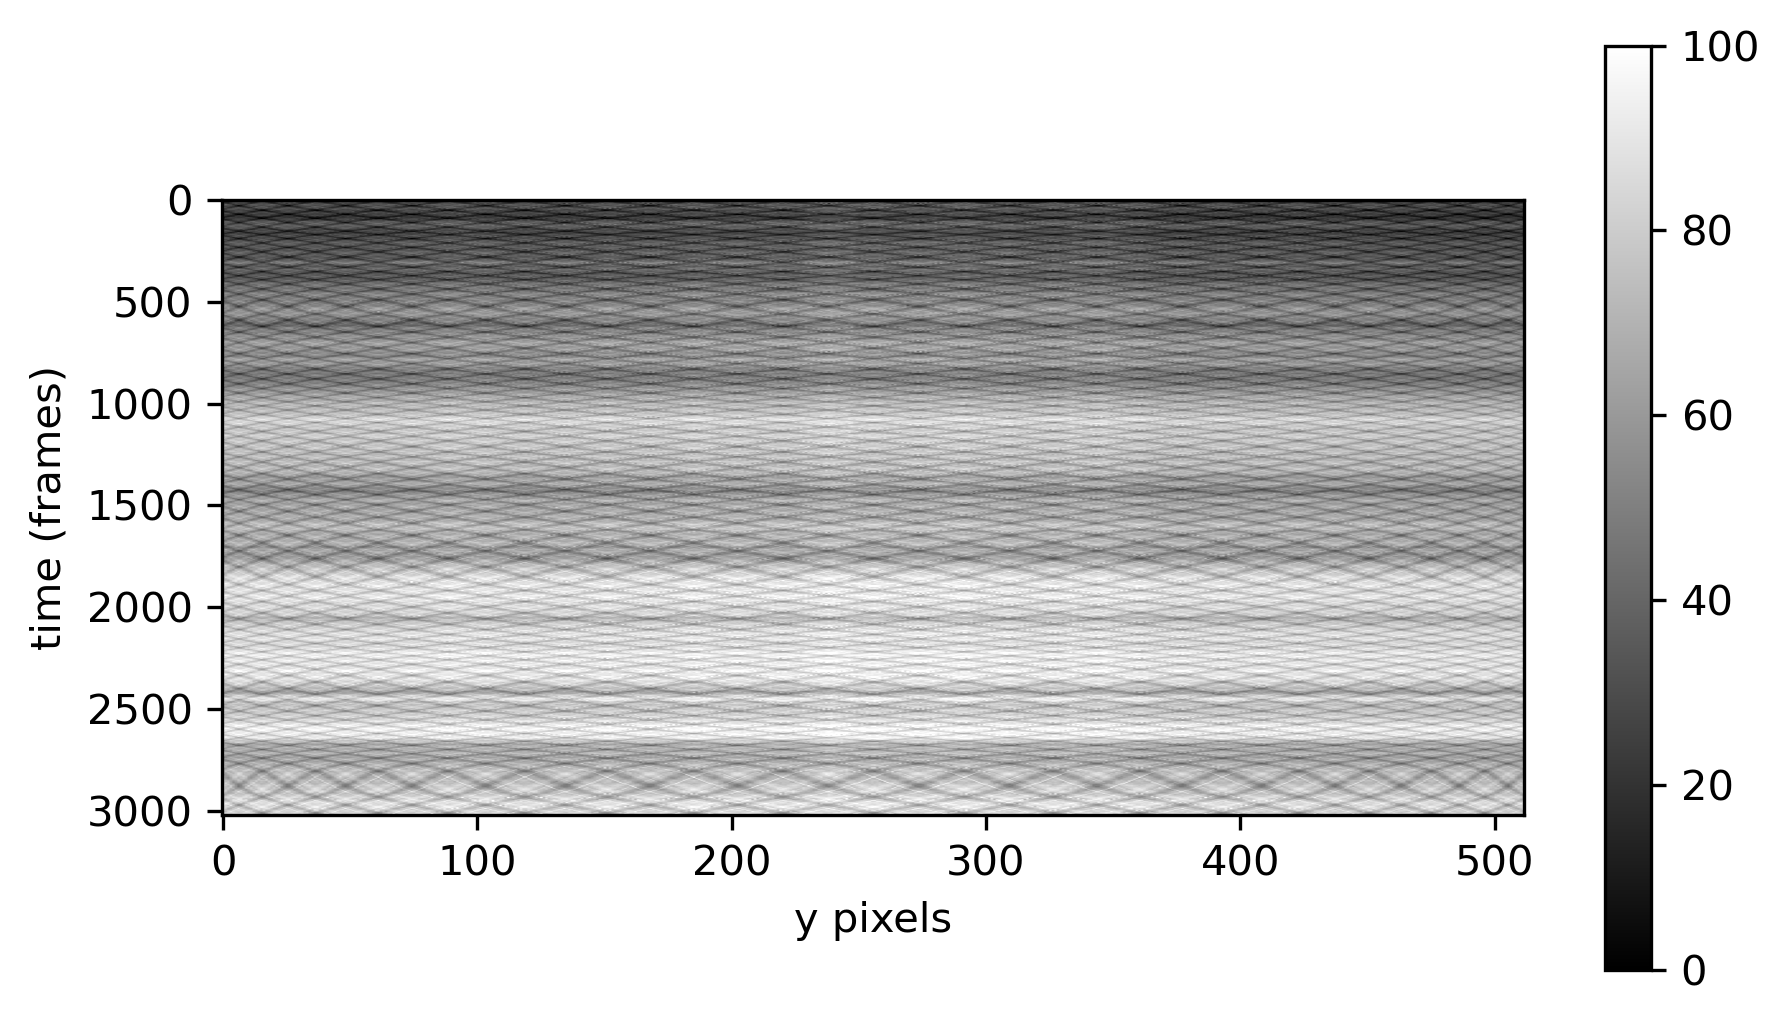

In [118]:
plt.figure(figsize=(7,4), dpi=300)
plt.imshow(mean_of_banded_block, aspect=0.08, cmap='gray', vmin=0, vmax=100)
plt.colorbar()
plt.xlabel('y pixels')
plt.ylabel('time (frames)')

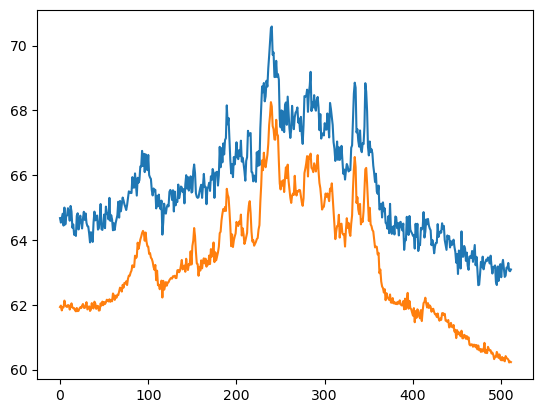

In [ ]:
plt.plot(np.mean(mean_of_banded_block[:,:],0))

In [ ]:

f_size = np.shape(rawimg[0,:,:])
noise_pattern = np.zeros_like(rawimg)
for f in tqdm(range(np.size(noise_pattern,0))):
    frsn = imgtools.boxcar_smooth(mean_of_banded_block[f,:],5)
    noise_pattern[f,:,:] = np.broadcast_to(frsn, f_size).copy()

100%|██████████| 3022/3022 [00:02<00:00, 1210.25it/s]


In [120]:
newimg = np.subtract(rawimg, noise_pattern)

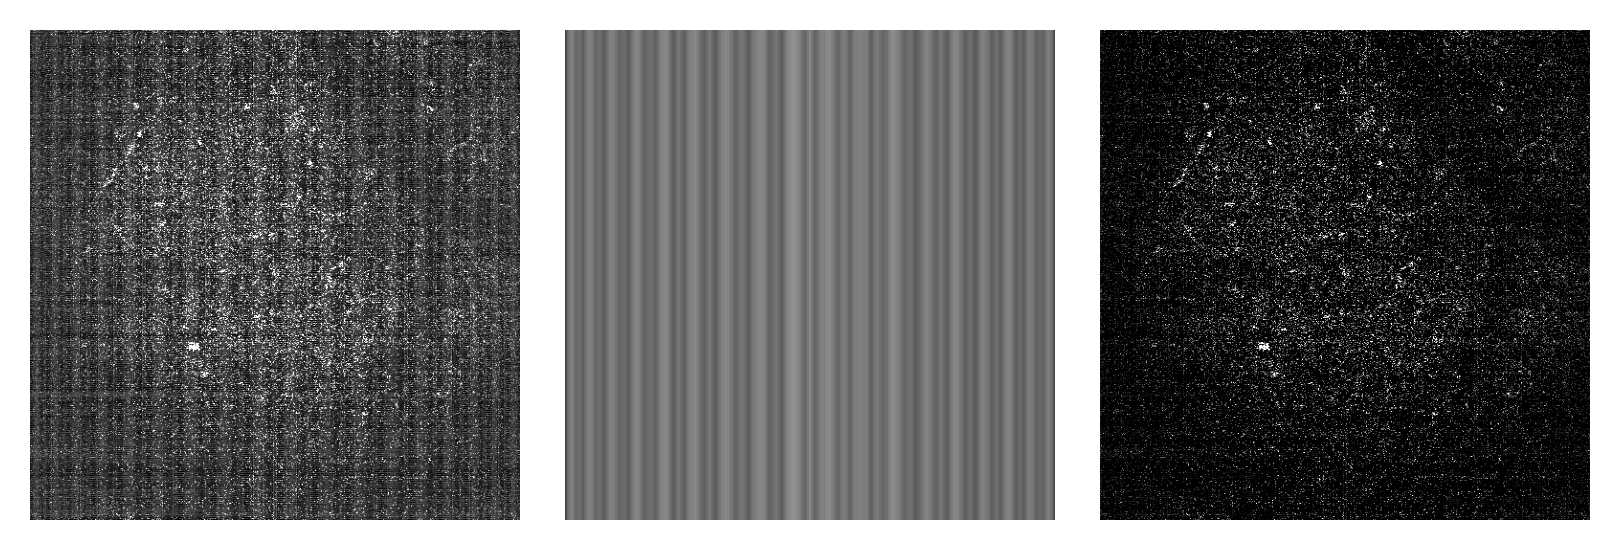

In [133]:
f = 500

fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize=(5.5,3), dpi=300)
ax1.imshow(rawimg[f,:,:], cmap='gray', vmin=0, vmax=200)
ax2.imshow(noise_pattern[f,:,:], cmap='gray', vmin=-10, vmax=120)
ax3.imshow(newimg[f,:,:], cmap='gray', vmin=0, vmax=200)
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
fig.tight_layout()

In [81]:
fig.get_size_inches()*300

array([1650.,  900.])

In [82]:
import cv2

In [129]:
ra_img = imgtools.rolling_average(rawimg, 11)
ra_newimg = imgtools.rolling_average(newimg, 11)

In [156]:
12*(1/7.5)

1.6

In [131]:
np.min(noise_pattern), np.max(noise_pattern)

(-7, 111)

In [136]:
np.min(ra_newimg), np.max(ra_newimg)

(-57.18181818181818, 1556.4545454545455)

(array([1.75837000e+05, 1.91027740e+07, 1.38963846e+08, 2.79417114e+08,
        2.17797957e+08, 8.80597510e+07, 2.92738120e+07, 9.71754900e+06,
        3.62941400e+06, 1.52635200e+06, 7.40992000e+05, 4.00161000e+05,
        2.35908000e+05, 1.49672000e+05, 1.02882000e+05, 7.13940000e+04,
        5.08490000e+04, 3.57060000e+04, 2.56180000e+04, 1.77280000e+04,
        1.30460000e+04, 9.56100000e+03, 7.25400000e+03, 5.70000000e+03,
        4.72800000e+03, 3.83600000e+03, 3.43300000e+03, 2.90700000e+03,
        2.53900000e+03, 2.25200000e+03, 2.05000000e+03, 1.87600000e+03,
        1.69800000e+03, 1.51300000e+03, 1.32900000e+03, 1.27800000e+03,
        1.18000000e+03, 1.15100000e+03, 1.00300000e+03, 9.93000000e+02,
        8.99000000e+02, 8.23000000e+02, 7.45000000e+02, 7.23000000e+02,
        6.41000000e+02, 6.10000000e+02, 5.83000000e+02, 5.51000000e+02,
        5.54000000e+02, 4.94000000e+02, 4.52000000e+02, 4.56000000e+02,
        4.21000000e+02, 3.83000000e+02, 3.47000000e+02, 3.550000

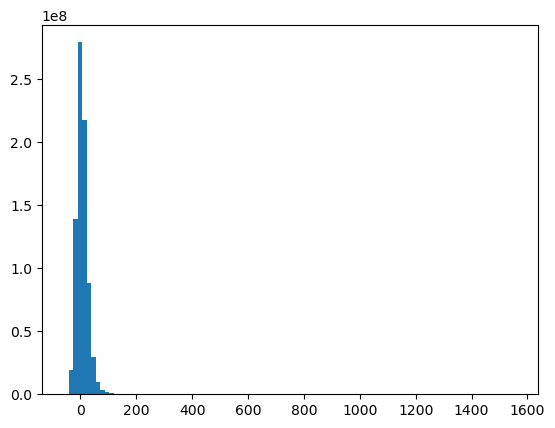

In [137]:
plt.hist(ra_newimg.flatten(), bins=100)

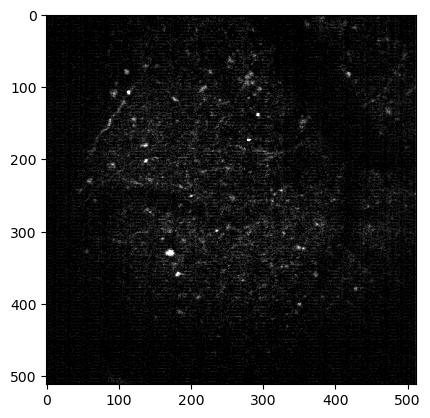

In [150]:
plt.imshow(ra_newimg[500], cmap='gray', vmin=0, vmax=175)

In [135]:
# make animation

# start/end crop value to align noise pattern with smoothed image stacks
# important to do the smoothing after noise is subtracted instead of before!
startEndFCrop = int((np.size(noise_pattern,0)-np.size(ra_img,0))/2)

vid_save_path = '250426_DMM_DMM046_LPaxons_fm4_res_scanner_noise_demo_v3.mp4'
startF = 500
endF = 1500

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out_vid = cv2.VideoWriter(vid_save_path, fourcc, (7.5*8), (1650, 900))

for f in tqdm(np.arange(startF, endF)):

    fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize=(5.5,3), dpi=300)
    ax1.imshow(ra_img[f,:,:], cmap='gray', vmin=0, vmax=200)
    ax2.imshow(noise_pattern[f+startEndFCrop,:,:], cmap='gray', vmin=-10, vmax=120)
    ax3.imshow(ra_newimg[f,:,:], cmap='gray', vmin=0, vmax=200)
    ax1.axis('off')
    ax2.axis('off')
    ax3.axis('off')
    fig.suptitle('frame {}'.format(f))
    fig.tight_layout()

    fig.canvas.draw()
    frame_as_array = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
    frame_as_array = frame_as_array.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close()

    img = cv2.cvtColor(frame_as_array, cv2.COLOR_RGB2BGR)
    out_vid.write(img.astype('uint8'))

out_vid.release()

  0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\dmartins\AppData\Local\Temp\ipykernel_19428\1727483222.py:27: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  frame_as_array = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
C:\Users\dmartins\AppData\Local\Temp\ipykernel_19428\1727483222.py:27: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  frame_as_array = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
100%|██████████| 1000/1000 [01:44<00:00,  9.59it/s]


In [ ]:
# make animation
vid_save_path = 'res_scanner_noise_demo_v2.mp4'
startF = 500
endF = 1000

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out_vid = cv2.VideoWriter(vid_save_path, fourcc, 7.49, (1650, 900))

for f in tqdm(np.arange(startF, endF)):

    fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize=(5.5,3), dpi=300)
    ax1.imshow(rawimg[f,:,:], cmap='gray', vmin=0, vmax=200)
    ax2.imshow(noise_pattern[f,:,:], cmap='gray')
    ax3.imshow(newimg[f,:,:], cmap='gray', vmin=0, vmax=200)
    ax1.axis('off')
    ax2.axis('off')
    ax3.axis('off')
    fig.suptitle('frame {}'.format(f))
    fig.tight_layout()

    fig.canvas.draw()
    frame_as_array = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
    frame_as_array = frame_as_array.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close()

    img = cv2.cvtColor(frame_as_array, cv2.COLOR_RGB2BGR)
    out_vid.write(img.astype('uint8'))

out_vid.release()

  0%|          | 0/500 [00:00<?, ?it/s]C:\Users\dmartins\AppData\Local\Temp\ipykernel_19428\3676391087.py:22: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  frame_as_array = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
C:\Users\dmartins\AppData\Local\Temp\ipykernel_19428\3676391087.py:22: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  frame_as_array = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
100%|██████████| 500/500 [00:45<00:00, 10.92it/s]


In [ ]:
fig, [ax1,ax2] = plt.subplots(1,3, figsize=(5.5,3), dpi=300)
ax1.imshow(rawimg[f,:,:], cmap='gray', vmin=0, vmax=200)
ax2.imshow(noise_pattern[f,:,:], cmap='gray')
ax3.imshow(newimg[f,:,:], cmap='gray', vmin=0, vmax=200)
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
fig.suptitle('frame {}'.format(f))
fig.tight_layout()

In [53]:
meanF = np.mean(newimg,axis=(1,2))

In [54]:
meanF.shape

(7562,)

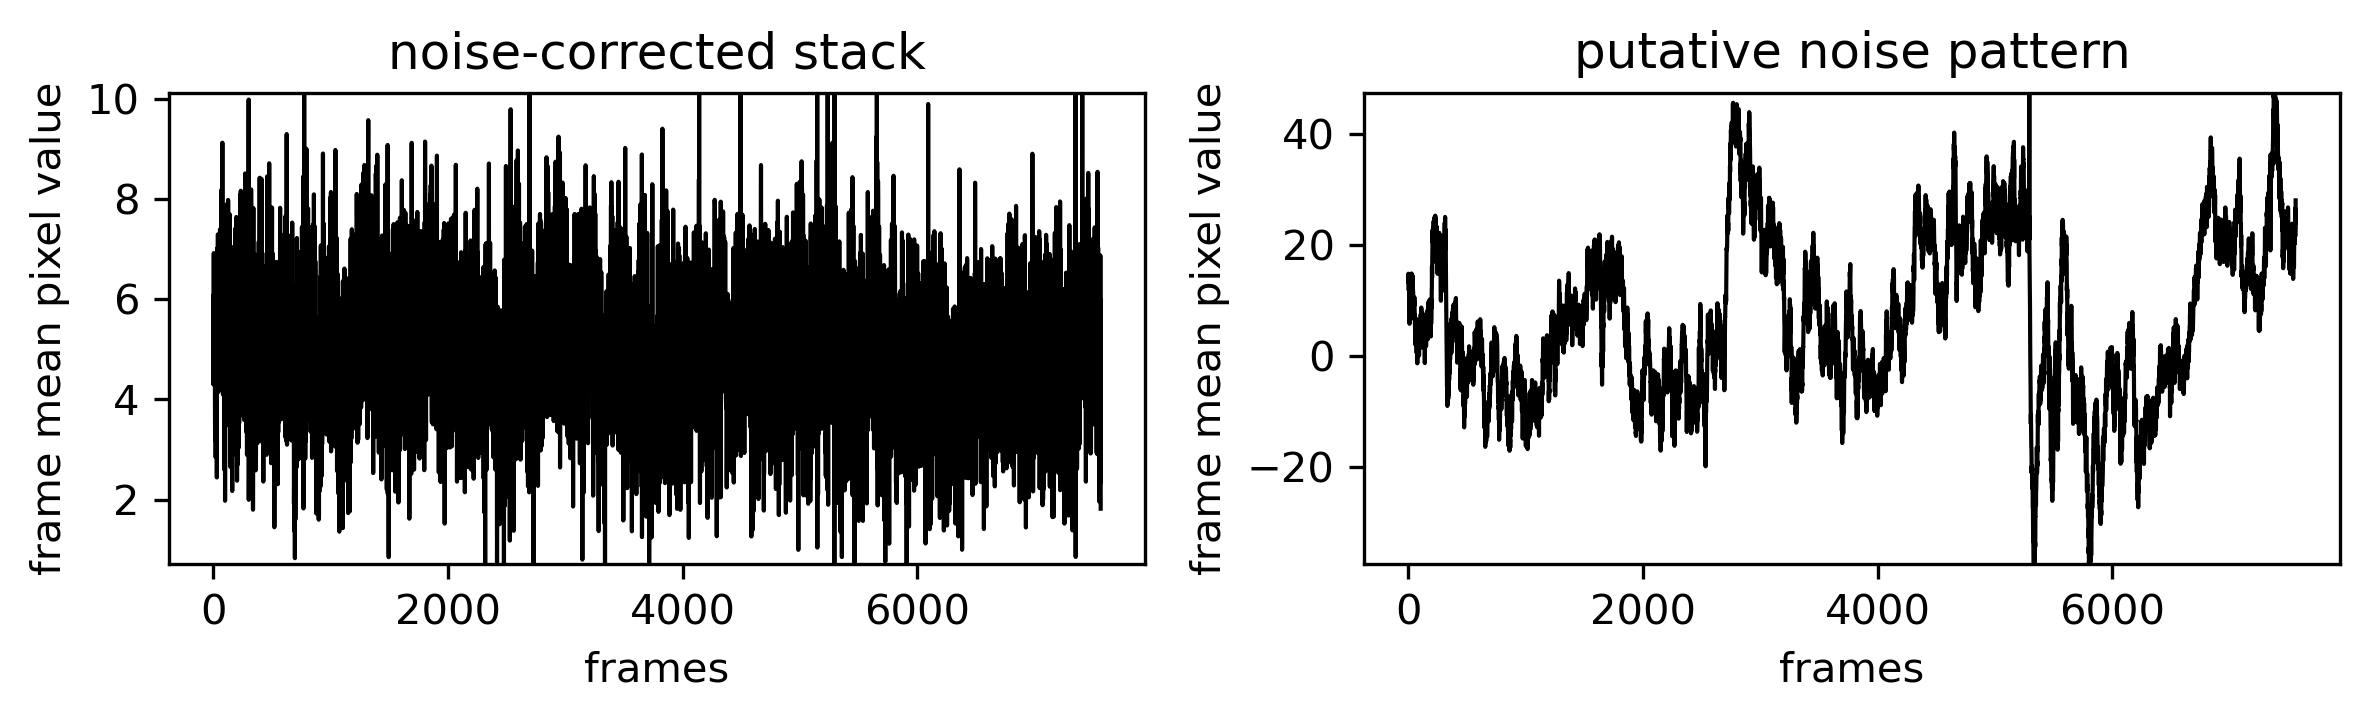

In [ ]:
fig, [ax1,ax2] = plt.subplots(1,2, dpi=300, figsize=(8,2.5))
ax1.plot(meanF, color='k', lw=1)
ax2.plot(meanP, color='k', lw=1)
ax1.set_xlabel('frames')
ax2.set_xlabel('frames')
ax1.set_ylabel('frame mean pixel value')
ax2.set_ylabel('frame mean pixel value')
ax1.set_ylim([np.percentile(meanF, 0.1), np.percentile(meanF, 99.9)])
ax2.set_ylim([np.percentile(meanP, 0.1), np.percentile(meanP, 99.9)])
ax1.set_title('noise-corrected stack')
ax2.set_title('putative noise pattern')
fig.tight_layout()

In [99]:
np.percentile(meanP, 0.1)*0.7

-26.297847460937497

(0.0, 20.0)

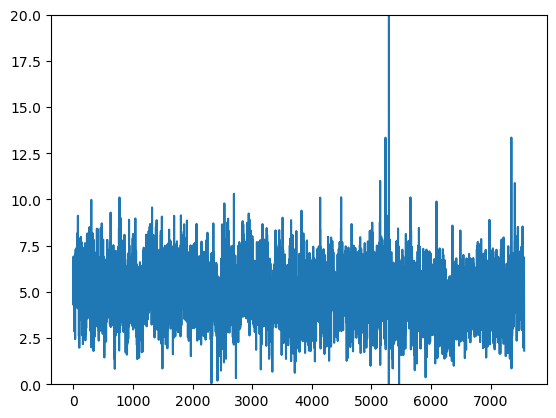

In [56]:
plt.plot(meanF)
plt.ylim([0,20])

In [86]:
meanP = np.mean(noise_pattern,axis=(1,2))

(-50.0, 60.0)

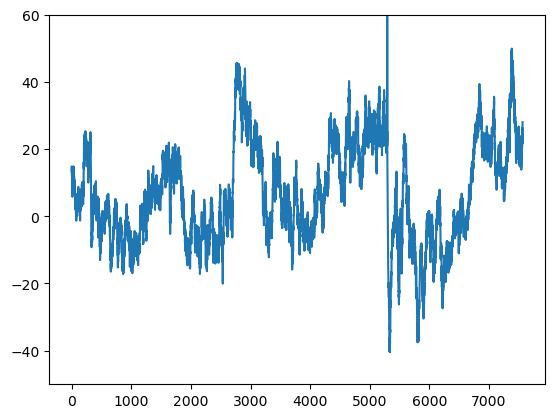

In [61]:
plt.plot(meanP)
plt.ylim([-50,60])